<a href="https://colab.research.google.com/github/tr41z/machine-learning/blob/main/AI_RAD_UL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Imports

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Machine learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
malicious_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/UNSW-NB15/CSV/Fine-Tuning/Malicious/Malicious.csv'
benign_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/UNSW-NB15/CSV/Fine-Tuning/Benign/Benign.csv'

malicious_data = pd.read_csv(malicious_dir)
benign_data = pd.read_csv(benign_dir)

In [ ]:
data = pd.concat([malicious_data, benign_data], ignore_index=True)
# data = data.sample(frac = 1) # shuffle data

fit_data = data.head(300)
fit_data

,id,src_ip,src_port,dst_ip,dst_port,protocol,total_bytes,total_packet_count,sbytes,smean,...,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time,last_updated_time,dur
0,538,192.168.1.103,34080,192.168.1.102,2146,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
1,539,192.168.1.103,53038,192.168.1.102,1171,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
2,540,192.168.1.103,49096,192.168.1.102,3664,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
3,541,192.168.1.103,60896,192.168.1.102,2054,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
4,542,192.168.1.103,50644,192.168.1.102,1553,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,835,192.168.1.103,52518,192.168.1.102,1598,6,120,2,180,60,...,0,0.0,181.392739,0,120.928493,0,3,1729701406,1729701407,0.992322
296,836,192.168.1.103,51946,192.168.1.102,692,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000
297,837,192.168.1.103,42066,192.168.1.102,1518,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701407,1729701407,0.000000
298,838,192.168.1.103,50832,192.168.1.102,1230,6,60,1,60,60,...,0,0.0,0.000000,0,0.000000,0,1,1729701406,1729701406,0.000000


In [ ]:
features = ['protocol', 'total_bytes', 'total_packet_count', 'sbytes',
            'smean', 'dmean', 'dbytes', 'dload', 'sload', 'dpkts',
            'rate', 'dttl', 'spkts', 'start_time']

dbscan_df = fit_data[features]
dbscan_df

,protocol,total_bytes,total_packet_count,sbytes,smean,dmean,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time
0,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
1,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
2,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
3,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
4,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,120,2,180,60,0,0,0.0,181.392739,0,120.928493,0,3,1729701406
296,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406
297,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701407
298,6,60,1,60,60,0,0,0.0,0.000000,0,0.000000,0,1,1729701406


In [ ]:
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(dbscan_df)

In [ ]:
# Convert back to DataFrame and retain original columns
dbscan_df = pd.DataFrame(normalized_data, columns=features)
dbscan_df['start_time'] *= 10
dbscan_df

,protocol,total_bytes,total_packet_count,sbytes,smean,dmean,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time
0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.416667,0.333333,0.416667,1.0,0.0,0.0,0.0,0.002075,0.0,0.002359,0.0,0.333333,0.0
296,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
297,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,10.0
298,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
# Fit DBSCAN
clustering = DBSCAN(eps=.5, min_samples=10).fit(dbscan_df)

# Assign cluster labels back to the original DataFrame using .loc
fit_data.loc[:, 'cluster'] = clustering.labels_

In [ ]:
# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(fit_data[features])

# Add PCA results to the DataFrame
fit_data.loc[:, 'PCA1'] = principal_components[:, 0]
fit_data.loc[:, 'PCA2'] = principal_components[:, 1]

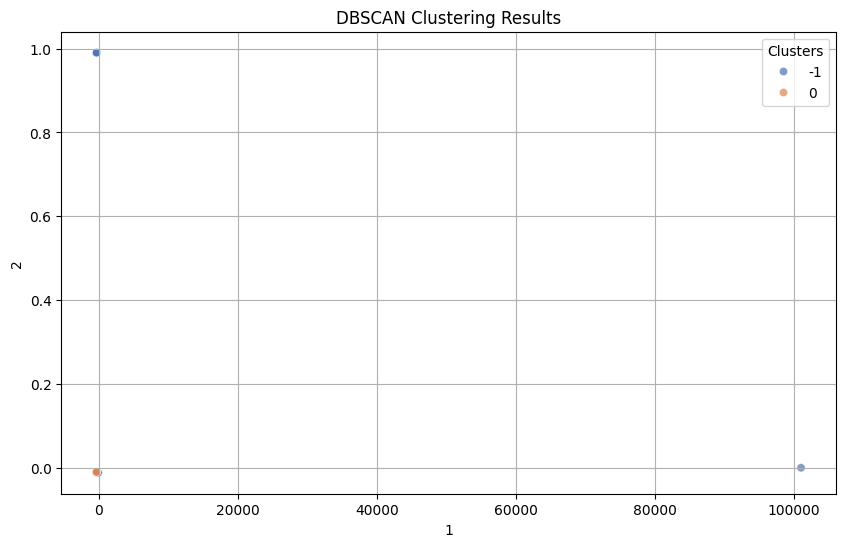

In [ ]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("deep", len(fit_data['cluster'].unique()))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=fit_data, palette=palette, legend='full', alpha=0.7)

plt.title('DBSCAN Clustering Results')
plt.xlabel('1')
plt.ylabel('2')
plt.legend(title='Clusters', loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Count the number of unique 'src_port' values in cluster 0
unique_vals = fit_data[fit_data['cluster'] == 0]['src_ip'].unique()

print(f"Number of unique 'src_port' values in cluster 0: {unique_vals}")

Number of unique 'src_port' values in cluster 0: ['192.168.1.103']


# 🔀 Shuffle first 300 rows

In [ ]:
data.head()

,id,src_ip,src_port,dst_ip,dst_port,protocol,total_bytes,total_packet_count,sbytes,smean,...,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time,last_updated_time,dur
34640,35851,192.168.1.103,42186,192.168.1.102,4550,6,160,4,280,40,...,0,0.0,994.770359,0,568.440205,0,7,1729702289,1729702289,0.281472
28397,29525,192.168.1.103,42186,192.168.1.102,8318,6,160,4,280,40,...,0,0.0,5234.916981,0,2991.381132,0,7,1729702187,1729702187,0.053487
20313,21263,192.168.1.103,49186,192.168.1.102,8080,6,379,5,698,77,...,0,0.0,18277.993432,0,9924.583826,0,9,1729701867,1729701867,0.038188
22897,23966,192.168.1.103,41818,192.168.1.102,8080,6,364,5,668,74,...,0,0.0,17507.534753,0,9540.033907,0,9,1729702047,1729702047,0.038155
11325,12209,192.168.1.103,36090,192.168.1.102,8080,6,400,5,740,82,...,0,0.0,619765.488267,0,335008.372036,0,9,1729701696,1729701696,0.001194


In [ ]:
data = data.sample(frac = 1) # shuffle data

In [ ]:
fit_data_shf = data.head(300)
fit_data_shf

,id,src_ip,src_port,dst_ip,dst_port,protocol,total_bytes,total_packet_count,sbytes,smean,...,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time,last_updated_time,dur
1088,1635,192.168.1.103,57450,192.168.1.102,829,6,60,1,60,60,...,0,0.000000,0.000000,0,0.000000,0,1,1729701409,1729701409,0.000000
41314,42268,20.90.152.133,443,192.168.1.102,49193,6,364,4,470,156,...,218,17676.153297,38109.137841,4,29514.311009,64,3,1729704308,1729704308,0.012333
11022,11906,192.168.1.103,45602,192.168.1.102,8080,6,395,5,730,81,...,0,0.000000,124044.182754,0,67119.797518,0,9,1729701677,1729701677,0.005885
15954,16871,192.168.1.103,55482,192.168.1.102,8080,6,401,5,742,82,...,0,0.000000,65628.869963,0,35467.893336,0,9,1729701789,1729701789,0.011306
5508,6319,192.168.1.103,41462,192.168.1.102,2999,6,160,4,280,40,...,0,0.000000,112676.053494,0,64386.316282,0,7,1729701521,1729701521,0.002485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39804,403,192.168.1.103,54312,104.86.110.202,80,6,104,2,104,52,...,52,0.000000,0.000000,1,0.000000,60,2,1729701373,1729701373,0.000000
49821,57829,172.64.147.231,443,192.168.1.102,55720,6,180,3,204,68,...,104,721.906334,1416.047040,2,1249.453270,64,3,1729769895,1729769895,0.144063
22355,23423,192.168.1.103,34740,192.168.1.102,8080,6,393,5,726,80,...,0,0.000000,324396.776377,0,175603.213659,0,9,1729702040,1729702040,0.002238
37592,38838,192.168.1.103,42186,192.168.1.102,2971,6,80,2,120,40,...,0,0.000000,4907.573851,0,3271.715900,0,3,1729702336,1729702336,0.024452


In [ ]:
features = ['protocol', 'total_bytes', 'total_packet_count', 'sbytes',
            'smean', 'dmean', 'dbytes', 'dload', 'sload', 'dpkts',
            'rate', 'dttl', 'spkts', 'start_time']

dbscan_df_shf = fit_data_shf[features]
dbscan_df_shf

,protocol,total_bytes,total_packet_count,sbytes,smean,dmean,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time
1088,6,60,1,60,60,0,0,0.000000,0.000000,0,0.000000,0,1,1729701409
41314,6,364,4,470,156,54,218,17676.153297,38109.137841,4,29514.311009,64,3,1729704308
11022,6,395,5,730,81,0,0,0.000000,124044.182754,0,67119.797518,0,9,1729701677
15954,6,401,5,742,82,0,0,0.000000,65628.869963,0,35467.893336,0,9,1729701789
5508,6,160,4,280,40,0,0,0.000000,112676.053494,0,64386.316282,0,7,1729701521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39804,6,104,2,104,52,52,52,0.000000,0.000000,1,0.000000,60,2,1729701373
49821,6,180,3,204,68,52,104,721.906334,1416.047040,2,1249.453270,64,3,1729769895
22355,6,393,5,726,80,0,0,0.000000,324396.776377,0,175603.213659,0,9,1729702040
37592,6,80,2,120,40,0,0,0.000000,4907.573851,0,3271.715900,0,3,1729702336


In [ ]:
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data_shf = scaler.fit_transform(dbscan_df_shf)

In [ ]:
# Convert back to DataFrame and retain original columns
dbscan_df_shf = pd.DataFrame(normalized_data_shf, columns=features)
dbscan_df_shf

,protocol,total_bytes,total_packet_count,sbytes,smean,dmean,dbytes,dload,sload,dpkts,rate,dttl,spkts,start_time
0,0.0,0.000005,0.000000,0.000002,0.014695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.002948
1,0.0,0.000073,0.000717,0.000049,0.085231,0.037604,0.000051,0.014668,0.004889,0.001341,0.007510,1.0000,0.000320,0.045047
2,0.0,0.000080,0.000956,0.000079,0.030125,0.000000,0.000000,0.000000,0.015915,0.000000,0.017078,0.0000,0.001281,0.006840
3,0.0,0.000081,0.000956,0.000080,0.030860,0.000000,0.000000,0.000000,0.008420,0.000000,0.009024,0.0000,0.001281,0.008466
4,0.0,0.000027,0.000717,0.000027,0.000000,0.000000,0.000000,0.000000,0.014456,0.000000,0.016382,0.0000,0.000961,0.004574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000014,0.000239,0.000007,0.008817,0.036212,0.000012,0.000000,0.000000,0.000335,0.000000,0.9375,0.000160,0.002425
296,0.0,0.000032,0.000478,0.000019,0.020573,0.036212,0.000024,0.000599,0.000182,0.000671,0.000318,1.0000,0.000320,0.997502
297,0.0,0.000079,0.000956,0.000078,0.029390,0.000000,0.000000,0.000000,0.041620,0.000000,0.044680,0.0000,0.001281,0.012111
298,0.0,0.000009,0.000239,0.000009,0.000000,0.000000,0.000000,0.000000,0.000630,0.000000,0.000832,0.0000,0.000320,0.016410


In [ ]:
# Fit DBSCAN
clustering = DBSCAN(eps=.5, min_samples=10).fit(dbscan_df_shf)

# Assign cluster labels back to the original DataFrame using .loc
fit_data_shf.loc[:, 'cluster'] = clustering.labels_

<ipython-input-86-eb9900780602>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data_shf.loc[:, 'cluster'] = clustering.labels_


In [ ]:
# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(fit_data_shf[features])

# Add PCA results to the DataFrame
fit_data_shf.loc[:, 'PCA1'] = principal_components[:, 0]
fit_data_shf.loc[:, 'PCA2'] = principal_components[:, 1]

<ipython-input-87-4f9ac0661e9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data_shf.loc[:, 'PCA1'] = principal_components[:, 0]
<ipython-input-87-4f9ac0661e9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data_shf.loc[:, 'PCA2'] = principal_components[:, 1]


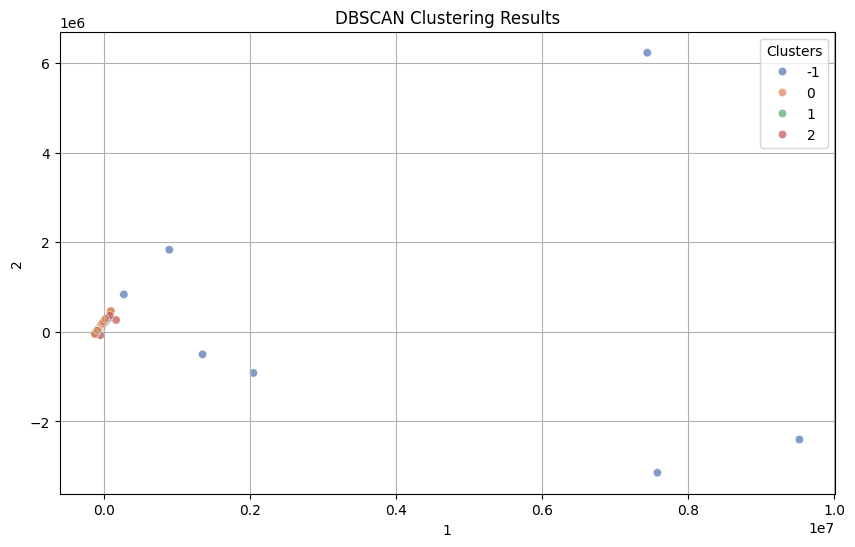

In [ ]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("deep", len(fit_data_shf['cluster'].unique()))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=fit_data_shf, palette=palette, legend='full', alpha=0.7)

plt.title('DBSCAN Clustering Results')
plt.xlabel('1')
plt.ylabel('2')
plt.legend(title='Clusters', loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Count unique values in each cluster
cluster_counts = fit_data_shf['cluster'].value_counts()

# Print the counts for each cluster
print("Unique values under each cluster:")
print(cluster_counts)

Unique values under each cluster:
cluster
 0    223
 2     32
 1     26
-1     19
Name: count, dtype: int64


In [ ]:
# Number of samples to display from cluster 0
num_samples = 10

# Filter the DataFrame for cluster 0
cluster_0_samples = fit_data_shf[fit_data_shf['cluster'] == 0].head(num_samples)

# Print the sample values from cluster 0
print("Sample values from cluster 0:")
cluster_0_samples

Sample values from cluster 0:


,id,src_ip,src_port,dst_ip,dst_port,protocol,total_bytes,total_packet_count,sbytes,smean,...,dpkts,rate,dttl,spkts,start_time,last_updated_time,dur,cluster,PCA1,PCA2
1088,1635,192.168.1.103,57450,192.168.1.102,829,6,60,1,60,60,...,0,0.000000,0,1,1729701409,1729701409,0.000000,0,-119808.918499,-46214.466334
11022,11906,192.168.1.103,45602,192.168.1.102,8080,6,395,5,730,81,...,0,67119.797518,0,9,1729701677,1729701677,0.005885,0,-64073.034833,83161.159068
15954,16871,192.168.1.103,55482,192.168.1.102,8080,6,401,5,742,82,...,0,35467.893336,0,9,1729701789,1729701789,0.011306,0,-89990.986341,22075.356138
5508,6319,192.168.1.103,41462,192.168.1.102,2999,6,160,4,280,40,...,0,64386.316282,0,7,1729701521,1729701521,0.002485,0,-68971.990083,72892.064352
1637,2189,192.168.1.103,48854,192.168.1.102,669,6,60,1,60,60,...,0,0.000000,0,1,1729701411,1729701411,0.000000,0,-119808.912431,-46214.467178
16770,17698,192.168.1.103,60772,192.168.1.102,8080,6,394,5,728,80,...,0,18812.070920,0,9,1729701806,1729701806,0.020944,0,-103695.666371,-10167.279962
3952,4698,192.168.1.103,41462,192.168.1.102,401,6,160,4,280,40,...,0,28333.628850,0,7,1729701495,1729701495,0.005647,0,-97313.533624,6146.989856
4671,5449,192.168.1.103,41462,192.168.1.102,8,6,160,4,280,40,...,0,3608.886866,0,7,1729701507,1729701507,0.044335,0,-116749.923487,-39626.441115
2624,3302,192.168.1.103,41462,192.168.1.102,639,6,160,4,280,40,...,0,6164.515296,0,7,1729701471,1729701472,0.025955,0,-114741.021508,-34895.138184
9415,10268,192.168.1.103,57778,192.168.1.102,8080,6,120,2,180,60,...,0,107.334145,0,3,1729701626,1729701627,1.118004,0,-119609.903239,-46089.755360


In [ ]:
# Count the number of unique 'src_port' values in cluster 0
unique_vals = fit_data_shf[fit_data_shf['cluster'] == 0]['src_ip'].unique()

print(f"Number of unique 'src_port' values in cluster 0: {unique_vals}")

Number of unique 'src_port' values in cluster 0: ['192.168.1.103']
